In [53]:
import librosa
import librosa.display
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
#Die Audio-Dateien, die im Ordner "audiodat" sind, werden in .png umwandelt und im Ordner "spectogram" gespeichert.

In [29]:
PATH_TO_RAVDESS = Path.cwd() / "ravdess" / "spectogram"/"audiodat"

In [51]:
def precompute_spectrograms(path, dpi=50):
    files = Path(path).glob('*.wav')
    for filename in files:
        audio_tensor, sr = librosa.load(filename, sr=None)
        spectrogram = librosa.feature.melspectrogram(audio_tensor, sr=sr)
        log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
        librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')
        plt.gcf().savefig("{}{}_{}.png".format(filename.parent,dpi,filename.name), dpi=dpi)

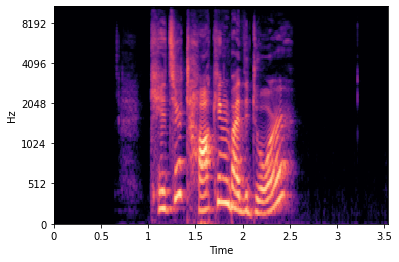

In [52]:
precompute_spectrograms(PATH_TO_RAVDESS)

In [54]:
#"surprise" wird von 8 auf 0 geändert
counter = 0
path = Path.cwd() / "ravdess" / "spectogram"
for file in os.listdir(path):
    if file.endswith("png"):
        if file.find("audiodat50") > -1:
            counter = counter + 1
            os.rename(os.path.join(path, file), os.path.join(path, file.replace("-08-", "-00-")))
if counter == 0:
    print("No file has been found")